Import science tools (Python packages)

In [192]:
import pandas
import matplotlib
matplotlib.pyplot.style.use('fivethirtyeight')

Read data from csv file into a dataframe.

In [193]:
books_df = pandas.read_csv('books.csv')

ParserError: Error tokenizing data. C error: Expected 10 fields in line 4012, saw 11


D'OH FAIL. Even this "clean" curated data set from Kaggle.com, specifically made to be an example data set for analysis, is formatted incorrectly and causes Pandas to fail because it is an invalid csv file. After cleaning it up by hand we get the valid file below which can be successfully loaded.  
  
(_This initial failed attempt to load the data has been left in the notebook on purpose as a real example to segue into talking about how 90% of "data science" is cleaning up bad, missing, or inconsistent data_)

In [194]:
books_df = pandas.read_csv('books_clean.csv')

Inspect the data in the `DataFrame`

In [195]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13719 entries, 0 to 13718
Data columns (total 10 columns):
bookID                13719 non-null int64
title                 13719 non-null object
authors               13719 non-null object
average_rating        13719 non-null float64
isbn                  13719 non-null object
isbn13                13719 non-null int64
language_code         13719 non-null object
# num_pages           13719 non-null int64
ratings_count         13719 non-null int64
text_reviews_count    13719 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 1.0+ MB


In [196]:
books_df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [197]:
books_df.describe()

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
count,13719.000000,13719.000000,1.371900e+04,13719.000000,1.371900e+04,13719.000000
mean,22160.579270,3.930265,9.764024e+12,342.380713,1.775909e+04,533.439901
std,13699.603351,0.359432,3.986954e+11,252.618887,1.129371e+05,2528.565801
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10621.000000,3.770000,9.780345e+12,196.000000,8.250000e+01,7.000000
50%,21322.000000,3.960000,9.780613e+12,301.000000,6.300000e+02,40.000000
75%,33322.000000,4.130000,9.780940e+12,421.000000,4.737000e+03,222.000000
max,47709.000000,5.000000,9.790008e+12,6576.000000,5.629932e+06,93619.000000


Develop a hypothesis, such as _"book length correlates with book rating"_ or _"number of ratings per book correlates with book rating"_.

Discuss confounding variables, such as language. Look to see how language might affect the hypothesis before proceeding.

How does language affect rating distribution?

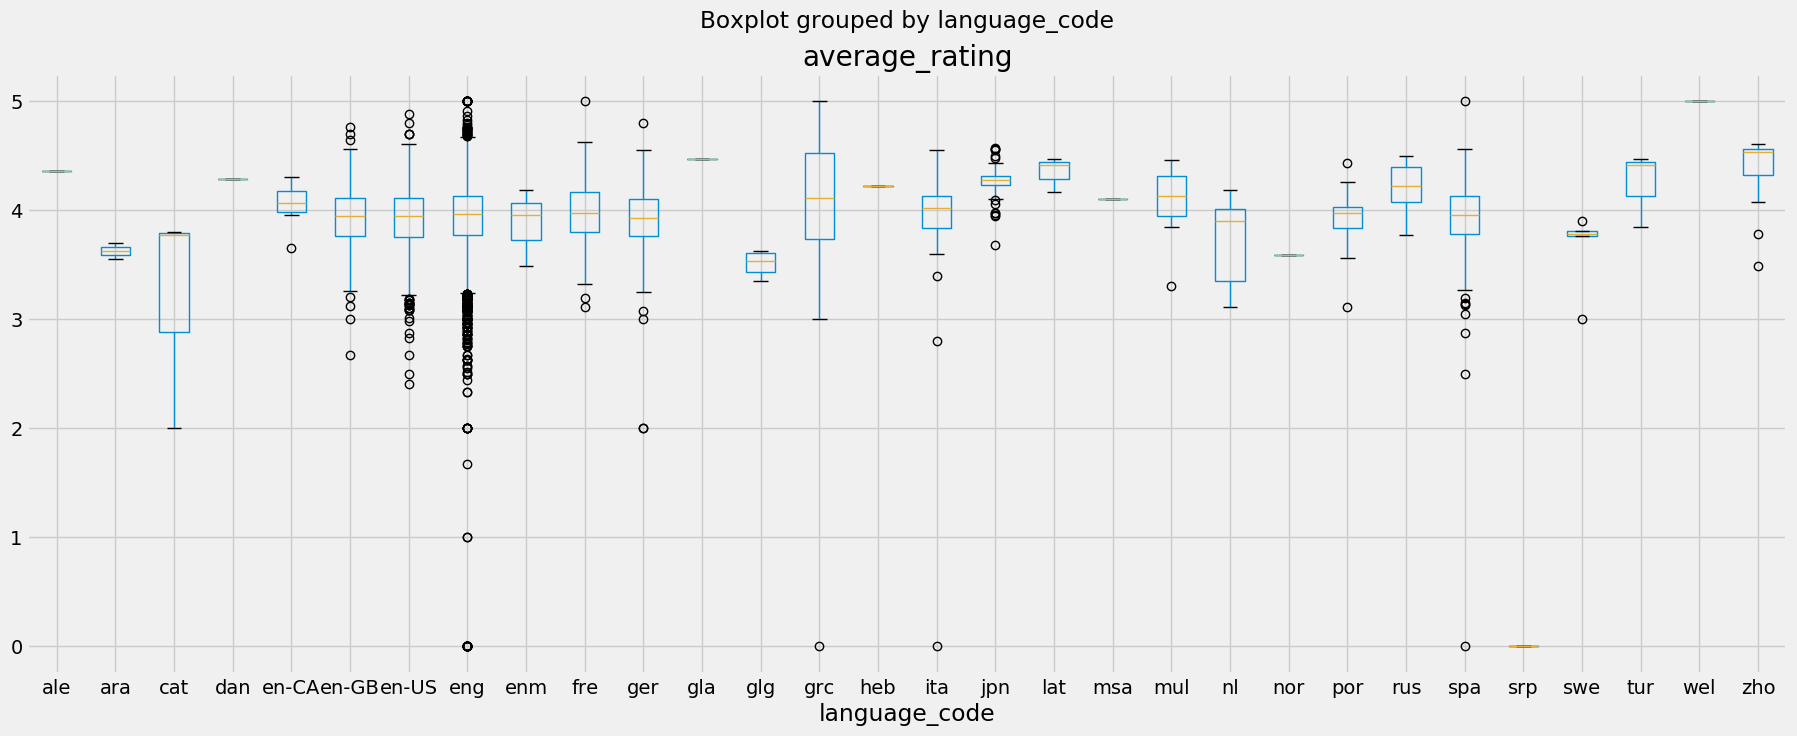

In [198]:
books_df.boxplot(column='average_rating', by='language_code', figsize=(22, 8))

There seems to be quite a bit of variation in average rating by language. Seems like we can isolate English to avoid confounding by language. Except Canadians; who appear to be slightly nicer reviewers than other English speakers :)

But will this leave us with enough data?

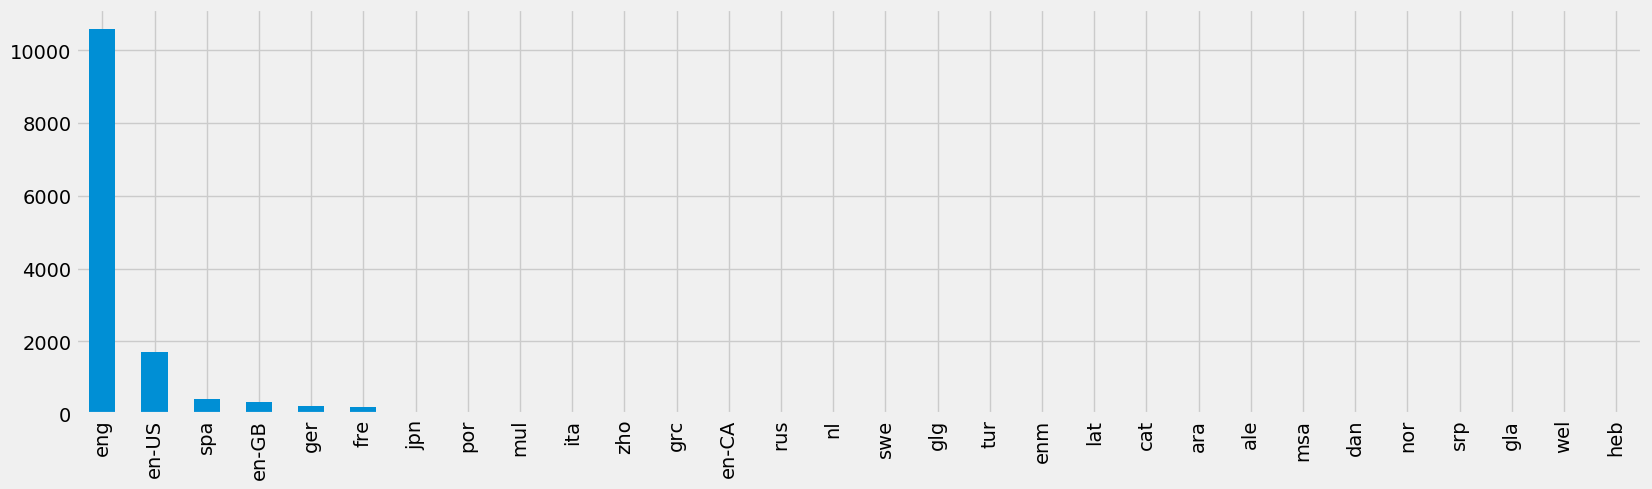

In [199]:
books_df.language_code.value_counts().plot(kind='bar', figsize=(18, 5))

Seems sufficient. Let's extract all English books from the dataset.

But first, how do we filter on a column?

In [200]:
books_df[books_df.language_code == 'zho'].head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
1645,4931,海邊的卡夫卡 上,Haruki Murakami-村上春樹-賴明珠,4.07,9571338400,9789571338408,zho,328,66,6
2028,5991,混血王子的背叛 (哈利波特 #6),J.K. Rowling-J.K.羅琳-皇冠編譯組-張定綺-彭倩文-趙丕慧-林靜華,4.56,9573321742,9789573321743,zho,735,69,0
2029,6003,火盃的考驗 (哈利波特 #4),J.K. Rowling-J.K.羅琳-彭倩文,4.55,9573318318,9789573318316,zho,768,82,1
4207,12810,Feng kuang,Ha Jin,3.49,9571341274,9789571341279,zho,300,0,0
4937,14731,戰廢品,Ha Jin-季思聰,3.78,9571343897,9789571343891,zho,392,1,0


Cool, but what is that doing?

First it is selecting a column.

In [201]:
books_df.language_code

0          eng
1          eng
2          eng
3          eng
4          eng
5          eng
6        en-US
7          eng
8          eng
9          eng
10         eng
11         eng
12       en-US
13         eng
14         eng
15         eng
16         eng
17         eng
18       en-US
19         eng
20         eng
21         eng
22         eng
23         eng
24         eng
25         eng
26       en-US
27         eng
28         eng
29         eng
         ...  
13689      eng
13690    en-GB
13691    en-GB
13692      eng
13693      eng
13694      eng
13695    en-US
13696      eng
13697    en-US
13698      eng
13699    en-CA
13700      spa
13701      eng
13702      eng
13703      spa
13704    en-GB
13705      eng
13706      spa
13707      eng
13708      eng
13709      eng
13710      spa
13711    en-US
13712      eng
13713      eng
13714      eng
13715      eng
13716    en-US
13717      eng
13718      eng
Name: language_code, Length: 13719, dtype: object

In [202]:
books_df['language_code']

0          eng
1          eng
2          eng
3          eng
4          eng
5          eng
6        en-US
7          eng
8          eng
9          eng
10         eng
11         eng
12       en-US
13         eng
14         eng
15         eng
16         eng
17         eng
18       en-US
19         eng
20         eng
21         eng
22         eng
23         eng
24         eng
25         eng
26       en-US
27         eng
28         eng
29         eng
         ...  
13689      eng
13690    en-GB
13691    en-GB
13692      eng
13693      eng
13694      eng
13695    en-US
13696      eng
13697    en-US
13698      eng
13699    en-CA
13700      spa
13701      eng
13702      eng
13703      spa
13704    en-GB
13705      eng
13706      spa
13707      eng
13708      eng
13709      eng
13710      spa
13711    en-US
13712      eng
13713      eng
13714      eng
13715      eng
13716    en-US
13717      eng
13718      eng
Name: language_code, Length: 13719, dtype: object

Then it is using a condisiton to generate a vector of booleans. When this vector of booleans is passed into a dataframe, only the rows corresponding to `True` are returned.

In [203]:
books_df.language_code == 'eng'

0         True
1         True
2         True
3         True
4         True
5         True
6        False
7         True
8         True
9         True
10        True
11        True
12       False
13        True
14        True
15        True
16        True
17        True
18       False
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26       False
27        True
28        True
29        True
         ...  
13689     True
13690    False
13691    False
13692     True
13693     True
13694     True
13695    False
13696     True
13697    False
13698     True
13699    False
13700    False
13701     True
13702     True
13703    False
13704    False
13705     True
13706    False
13707     True
13708     True
13709     True
13710    False
13711    False
13712     True
13713     True
13714     True
13715     True
13716    False
13717     True
13718     True
Name: language_code, Length: 13719, dtype: bool

Now lets filter for only English books.

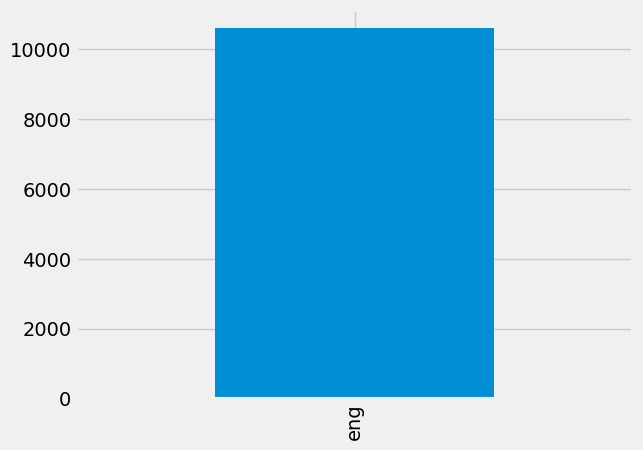

In [204]:
eng_books_df = books_df[books_df['language_code'] == 'eng']
eng_books_df.language_code.value_counts().plot(kind='bar')

It worked! But actually there are other English books. Check the full value count chart again and you will also see `en-GB`, `en-US`, `en-CA`. How can we filter on multiple values?

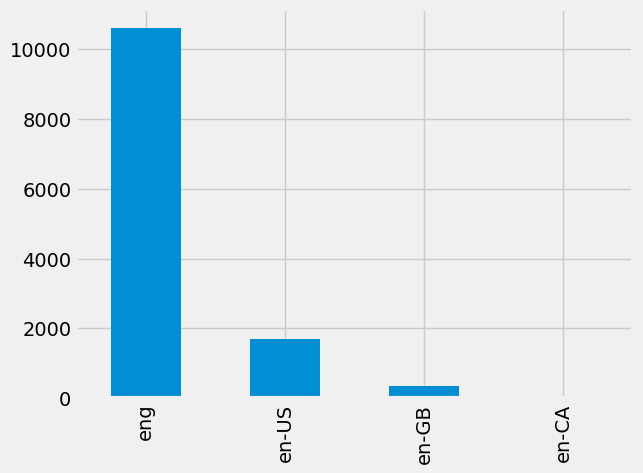

In [205]:
eng_books_df = books_df[(books_df['language_code'] == 'eng') | (books_df['language_code'] == 'en-GB') | (books_df['language_code'] == 'en-US') | (books_df['language_code'] == 'en-CA')]
eng_books_df.language_code.value_counts().plot(kind='bar')

Ok, that worked, but it was really ugly. Is there a nicer way to do it?

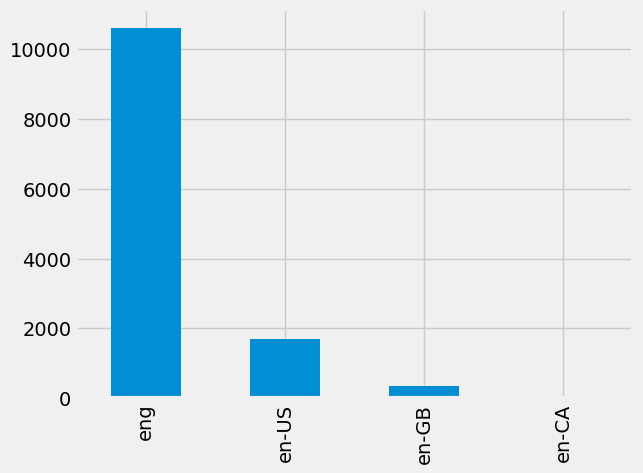

In [206]:
target_languages = ['eng', 'en-GB', 'en-US', 'en-CA']
eng_books_df = books_df[books_df['language_code'].isin(target_languages)]
eng_books_df.language_code.value_counts().plot(kind='bar')

Great. Anything else we might want to filter? Let's check the stats again.

In [207]:
eng_books_df.describe()

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
count,12648.000000,12648.000000,1.264800e+04,12648.000000,1.264800e+04,12648.000000
mean,21989.847565,3.927856,9.762243e+12,340.691493,1.906118e+04,574.013599
std,13633.407840,0.355635,4.151840e+11,255.536332,1.172645e+05,2625.668520
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10516.250000,3.770000,9.780345e+12,196.000000,1.140000e+02,10.000000
50%,20966.500000,3.950000,9.780553e+12,299.000000,8.020000e+02,50.000000
75%,33030.500000,4.130000,9.780813e+12,416.000000,5.548000e+03,252.000000
max,47709.000000,5.000000,9.790008e+12,6576.000000,5.629932e+06,93619.000000


Hmm, minimum average rating and rating count are both 0. What's going on?

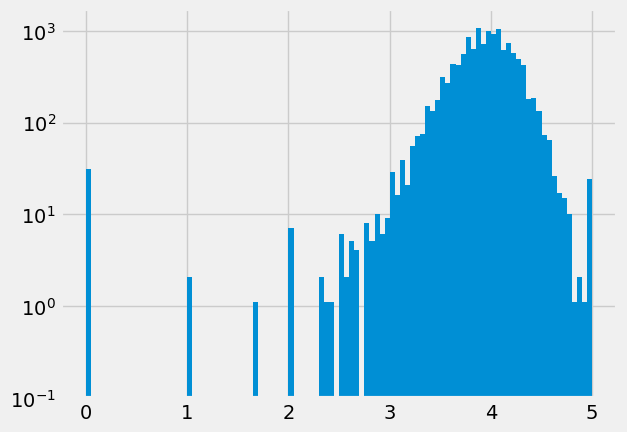

In [215]:
fig, axes =  matplotlib.pyplot.subplots()
eng_books_df.average_rating.hist(ax=axes, bins=100, bottom=0.1)
axes.set_yscale('log')

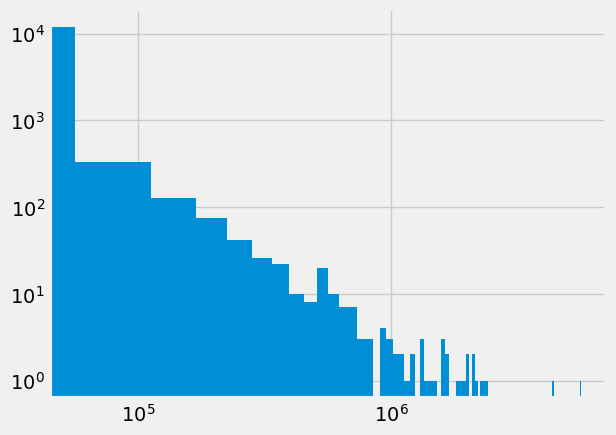

In [223]:
fig, axes =  matplotlib.pyplot.subplots()
eng_books_df.ratings_count.hist(ax=axes, bins=100)
axes.set_yscale('log')
axes.set_xscale('log')

Let's stick to popular books for now.

In [224]:
rated_books_df = eng_books_df[eng_books_df['ratings_count'] > 1000]

Is this enough data?

In [225]:
rated_books_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5961 entries, 0 to 13718
Data columns (total 11 columns):
bookID                5961 non-null int64
title                 5961 non-null object
authors               5961 non-null object
average_rating        5961 non-null float64
isbn                  5961 non-null object
isbn13                5961 non-null int64
language_code         5961 non-null object
# num_pages           5961 non-null int64
ratings_count         5961 non-null int64
text_reviews_count    5961 non-null int64
average_rating_log    5961 non-null float64
dtypes: float64(2), int64(5), object(4)
memory usage: 558.8+ KB


5,961 entries. Seems to be eougnh data. What do the stats look like now?

In [226]:
rated_books_df.describe()

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count,average_rating_log
count,5961.000000,5961.000000,5.961000e+03,5961.000000,5.961000e+03,5961.000000,5961.000000
mean,20926.395739,3.960569,9.775823e+12,365.464687,4.017618e+04,1195.075491,1.374251
std,13523.243338,0.255588,2.134969e+11,257.225977,1.683323e+05,3728.111424,0.065867
min,1.000000,2.400000,7.609203e+10,0.000000,1.001000e+03,4.000000,0.875469
25%,9640.000000,3.800000,9.780313e+12,228.000000,2.405000e+03,121.000000,1.335001
50%,18740.000000,3.970000,9.780447e+12,320.000000,6.200000e+03,280.000000,1.378766
75%,31474.000000,4.130000,9.780755e+12,432.000000,2.111500e+04,828.000000,1.418277
max,47709.000000,4.820000,9.790008e+12,6576.000000,5.629932e+06,93619.000000,1.572774


And the new ratings distribution?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12baade50>]],
      dtype=object)

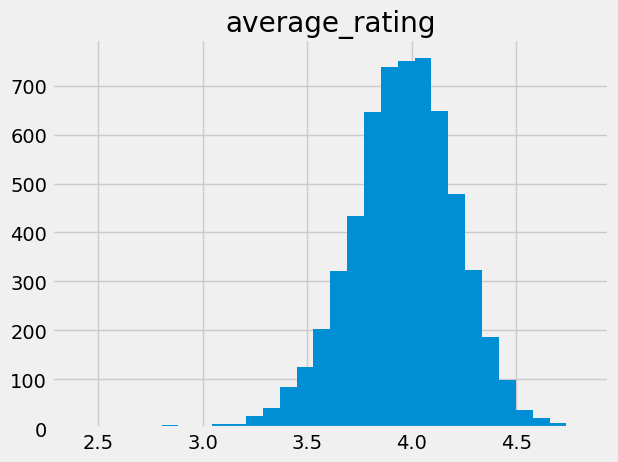

In [227]:
rated_books_df.hist(column='average_rating', bins=30)

Ok, time to test our hypothesis. Let's plot average rating vs rating count.

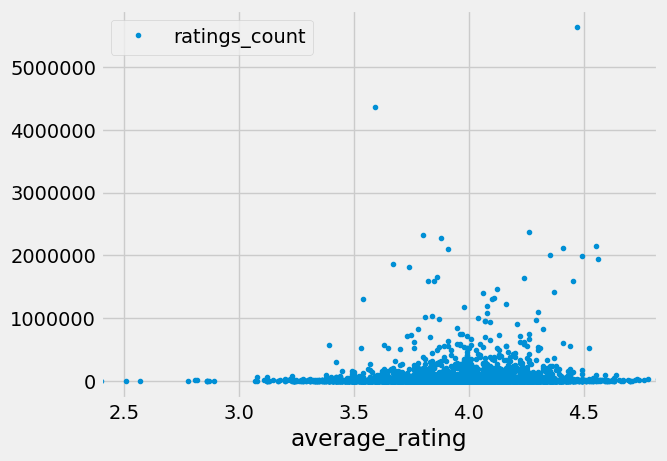

In [228]:
rated_books_df.plot(x='average_rating', y='ratings_count', style='.')

Hmm, what else can we plot?

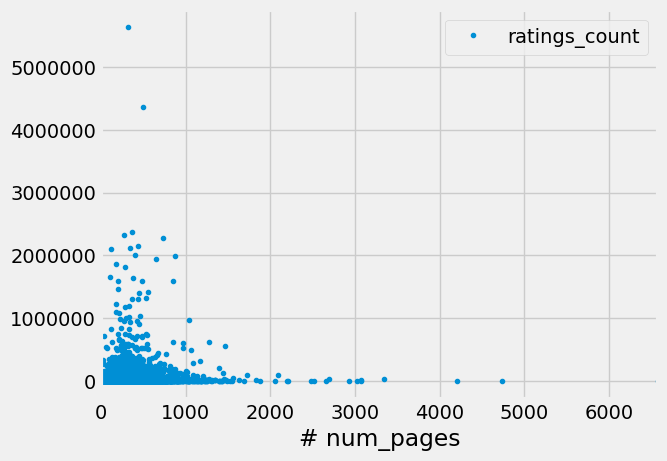

In [229]:
rated_books_df.plot(x='# num_pages', y='ratings_count', style='.')

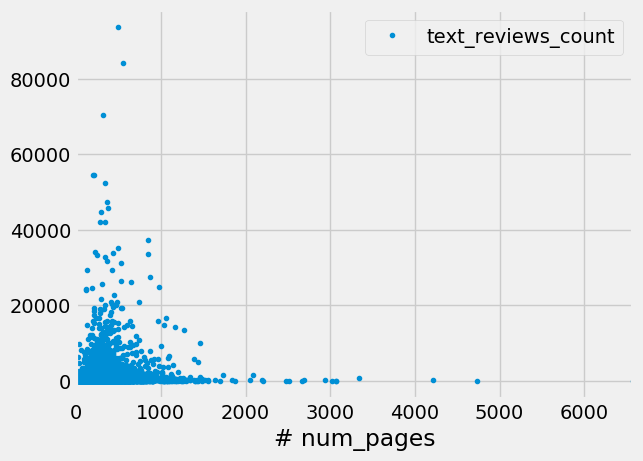

In [244]:
rated_books_df.plot(x='# num_pages', y='text_reviews_count', style='.')

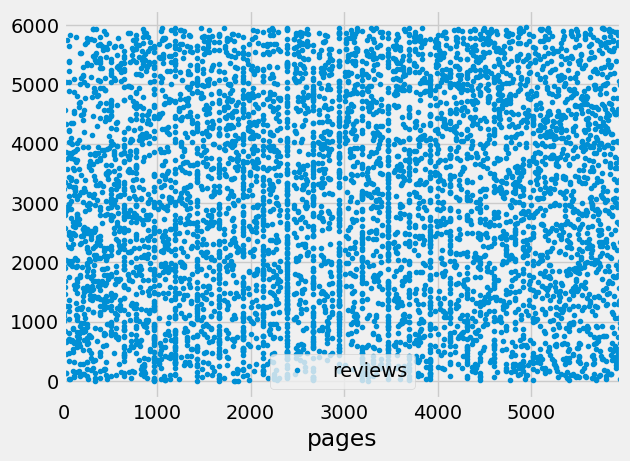

In [245]:
# TODO: MOVE THIS TO NOTES

rank_df = pandas.DataFrame({
    'pages': rated_books_df['# num_pages'].rank(),
    'reviews': rated_books_df['text_reviews_count'].rank()
})

rank_df.plot(x='pages', y='reviews', style='.')

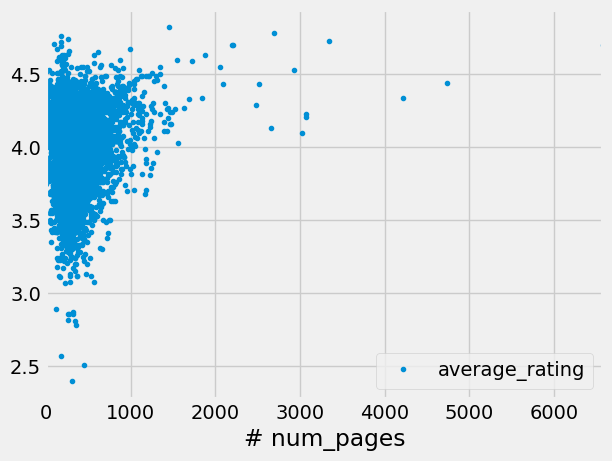

In [231]:
rated_books_df.plot(x='# num_pages', y='average_rating', style='.')

Can we just plot ALL THE THINGS???

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12922bb10>,
      dtype=object)

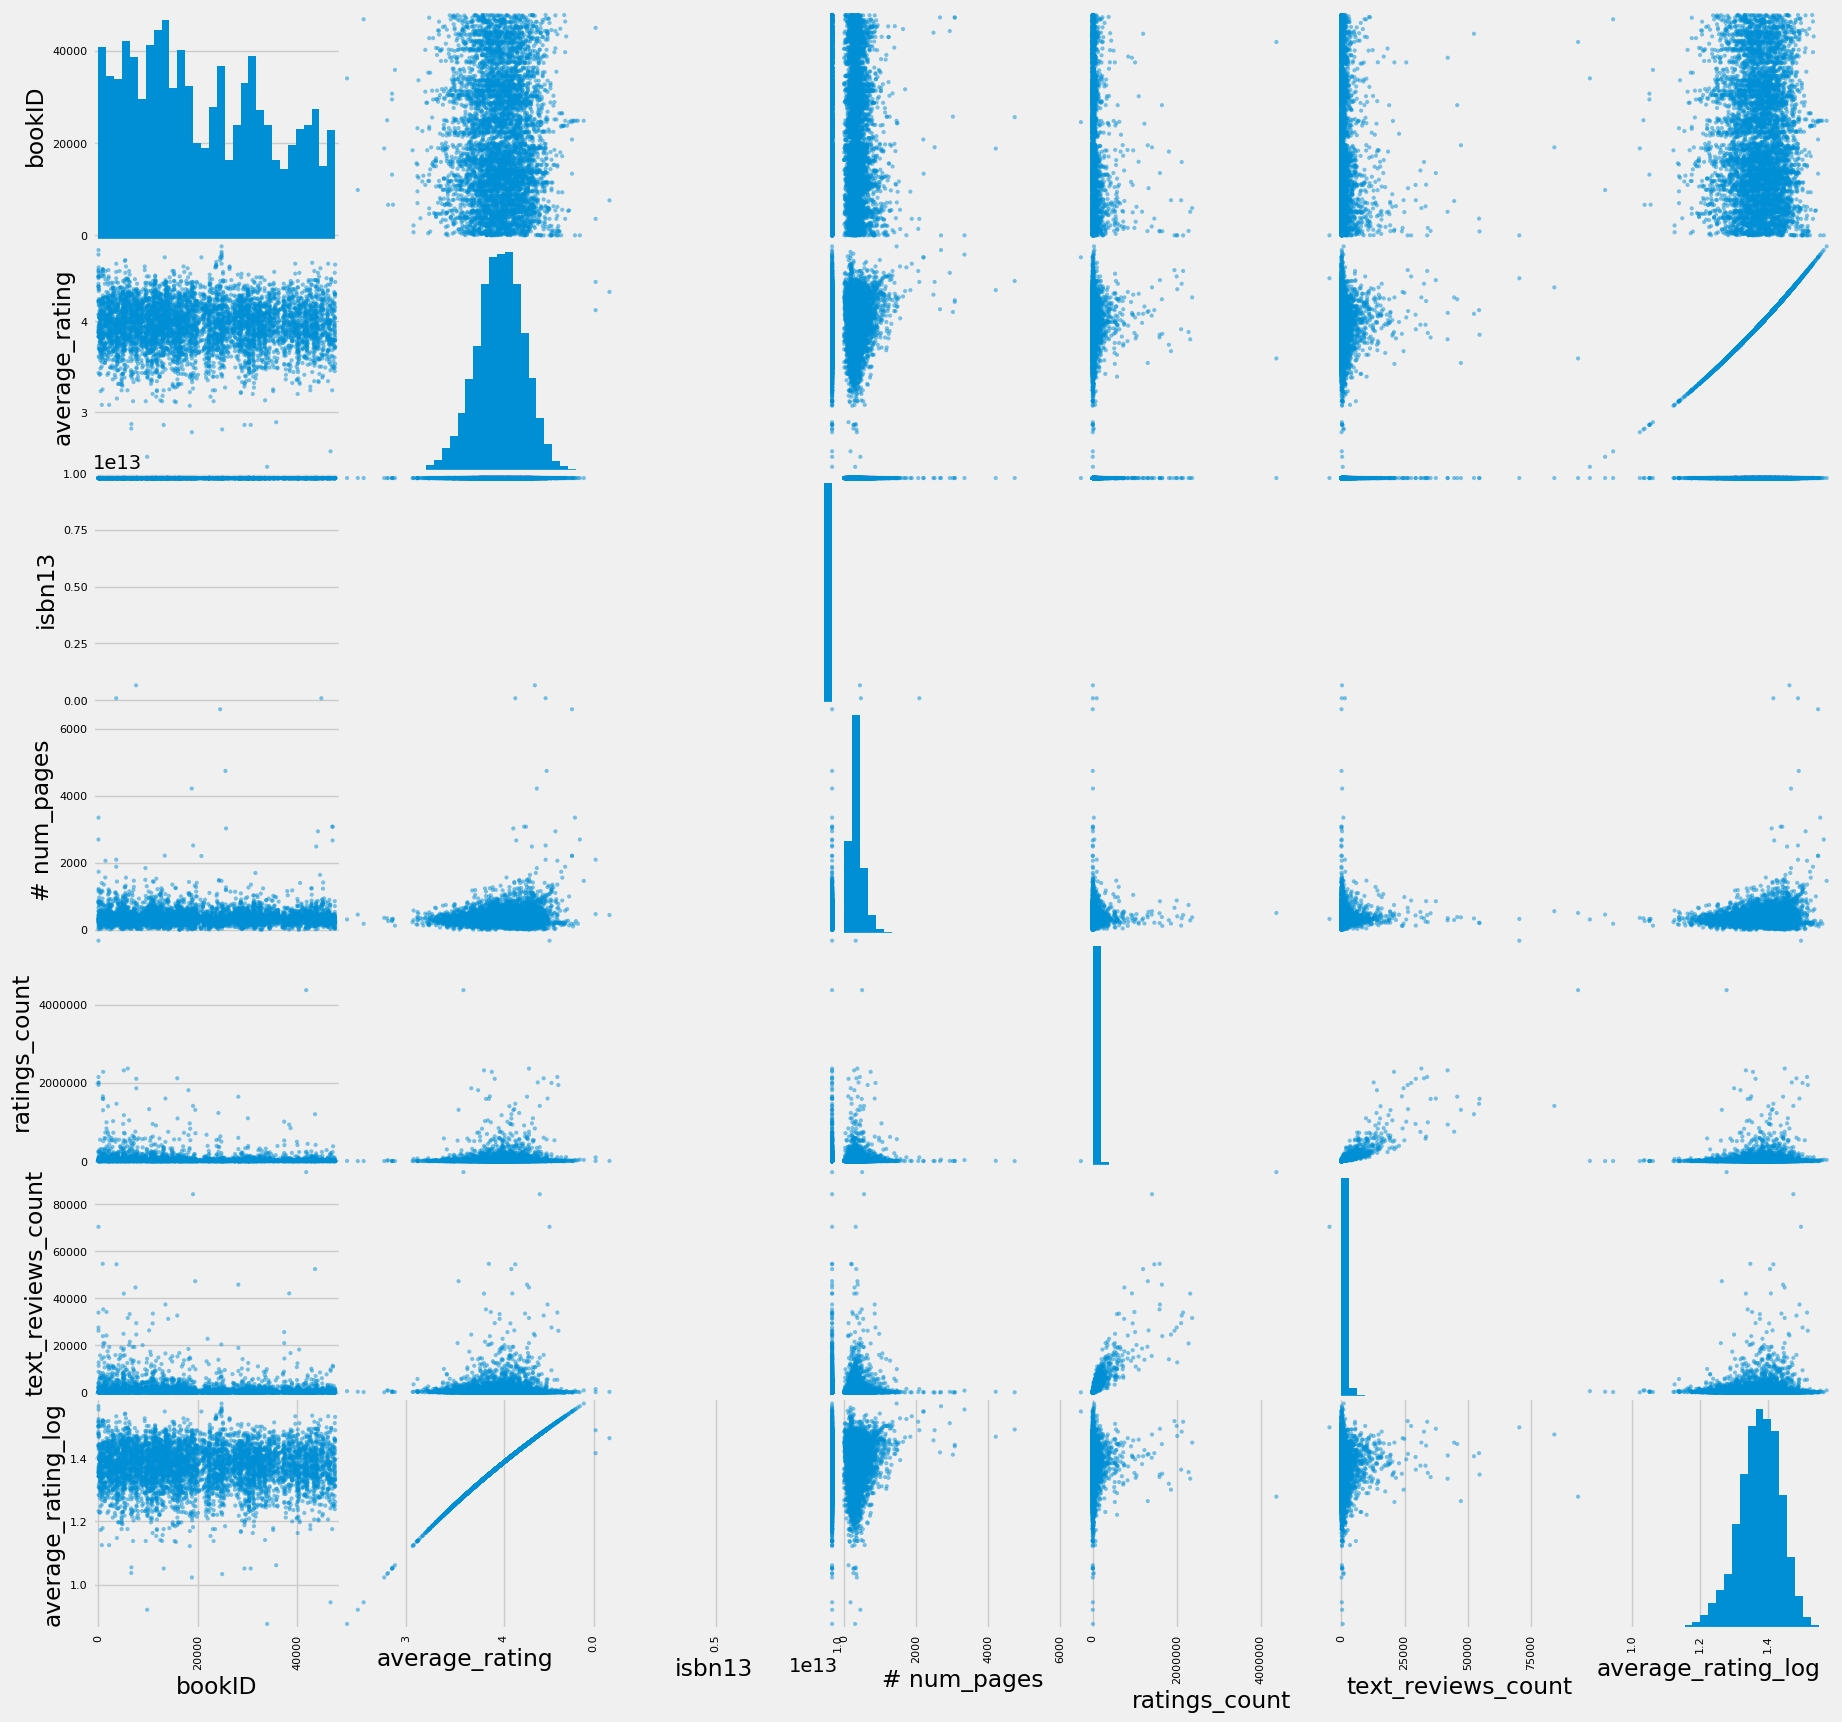

In [235]:
pandas.plotting.scatter_matrix(
    rated_books_df,
    figsize=(20, 20),
    hist_kwds={'bins': 30}
)

Hmm, some of them look quite strongly correlated. Can we see the actual correlation coefficients?

In [236]:
corr = rated_books_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count,average_rating_log
bookID,1,-0.0182377,0.00345581,-0.0128602,-0.103352,-0.107778,-0.0171364
average_rating,-0.0182377,1,-0.0287074,0.19585,0.0610475,0.0427397,0.998219
isbn13,0.00345581,-0.0287074,1,-0.0562058,0.000570105,0.00322552,-0.0275939
# num_pages,-0.0128602,0.19585,-0.0562058,1,0.0213982,0.0238347,0.189027
ratings_count,-0.103352,0.0610475,0.000570105,0.0213982,1,0.859028,0.059966
text_reviews_count,-0.107778,0.0427397,0.00322552,0.0238347,0.859028,1,0.0424854
average_rating_log,-0.0171364,0.998219,-0.0275939,0.189027,0.059966,0.0424854,1


Ok, but can it be more delightful?

In [ ]:
import matplotlib.pyplot as plot

f = plot.figure(figsize=(10, 8))
plot.matshow(rated_books_df.corr(), fignum=f.number)
plot.colorbar()
plot.show()

Let's take a closer look at text count vs ratings count as it seems to have the strongest correlation.

In [ ]:
rated_books_df.plot(x='text_reviews_count', y='ratings_count', style='.', figsize=(8, 8))

Do you think anyone bothered to take the time to write a text review but not leave a numeric rating? Seems unlikely. Can we see if any of the points go below the diagonal y = x?

In [ ]:
import numpy as np
import matplotlib.pyplot as plot
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plot.subplots(figsize=(5,5))
ax.scatter(rated_books_df.text_reviews_count, rated_books_df.ratings_count)
line = mlines.Line2D([0, 1], [0, 1], color='red', linewidth=0.8)
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plot.show()

TODO: THIS DOESN'T WORK. IT PLOTS THE DIAGONAL OF THE RENDERED CHART, NOT THE ACTUAL COORDINATE SYSTEM.